In [71]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Considerando a base de dados experimento_test_ab.csv responda as questões abaixo:

In [4]:
df_experimento = pd.read_csv('experimento_teste_ab.csv')

In [9]:
df_experimento.head()

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


In [8]:
df_experimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Visitante_ID   2000 non-null   int64 
 1   Versão_Página  2000 non-null   object
 2   Visualizações  2000 non-null   int64 
 3   Conversões     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


In [10]:
df_experimento.describe()

,Visitante_ID,Visualizações,Conversões
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,150.755500,0.115000
std,577.494589,28.809421,0.319102
min,1.000000,100.000000,0.000000
25%,500.750000,126.000000,0.000000
50%,1000.500000,151.000000,0.000000
75%,1500.250000,175.000000,0.000000
max,2000.000000,199.000000,1.000000


1. Qual dos cenários tem a maior taxa de conversão?

In [5]:
df_experimento_a = df_experimento.loc[df_experimento['Versão_Página'] == "A"]

In [7]:
visualizacoes_a = df_experimento_a['Visualizações'].sum()

In [6]:
conversao_a = df_experimento_a['Conversões'].sum()

In [8]:
df_experimento_b = df_experimento.loc[df_experimento['Versão_Página'] == "B"]

In [9]:
visualizacoes_b = df_experimento_b['Visualizações'].sum()

In [10]:
conversao_b = df_experimento_b['Conversões'].sum()

In [11]:
taxa_conversao_a = conversao_a / visualizacoes_a
taxa_conversao_b = conversao_b / visualizacoes_b

In [12]:
print(f'Taxa de conversão da Versão A: {taxa_conversao_a * 100}%.')
print(f'Taxa de conversão da Versão B: {taxa_conversao_b * 100}%.')

Taxa de conversão da Versão A: 0.06961249046971857%.
Taxa de conversão da Versão B: 0.08295946268815206%.


2. Calcule qual o tamanho da amostra necessária para o desenvolvimento
de um teste A/B, seguindo os seguintes critérios:

a. O cenário A, da base, como o inicial, que funciona hoje.

b. Considere 95% de confiança de que o efeito na conversão não foi
aleatório com um nível de significância de 5% (alpha = 0,05).

c. Também considere 80% de certeza conseguir capturar o efeito
da nova abordagem.

d. O aumento para 10% de conversão.

In [17]:
alpha = 0.05
beta = 0.2
nova_conversao = (taxa_conversao_a*(1 + 0.1))
variancia_a = df_experimento_a['Conversões'].var()

In [18]:
print(taxa_conversao_a)

0.0006961249046971857


In [15]:
print(nova_conversao)

0.0007657373951669042


In [26]:
##Delta
delta_a = 0.0007657373951669042 - 0.0006961249046971857
print(delta_a)

6.961249046971859e-05


In [23]:
## Z(1-alpha/2)
alpha_zscore = stats.norm.ppf(1-alpha/2)
print('Z(1-alpha/2) : {}'.format(str(alpha_zscore)))

Z(1-alpha/2) : 1.959963984540054


In [22]:
## Z(1-beta)
beta_zscore = stats.norm.ppf(1-beta)
print('Z(1-beta): {}'.format(str(beta_zscore)))

Z(1-beta): 0.8416212335729143


In [24]:
var = 2 * variancia_a
print('Variância estimada: {}'.format(str(var)))

Variância estimada: 0.18813813813813812


In [25]:
## Fórmula
n = (((alpha_zscore + beta_zscore)**2)*var)/delta_a
print(f'Amostra necessária para o grupo A: {n}')
print(f'Amostra necessária para o teste AB: {n*2}')

Amostra necessária para o grupo A: 21212.768135812556
Amostra necessária para o teste AB: 42425.53627162511


Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base
de dados de um hospital que trata de pacientes com problemas cardíacos.
Considere a base como a população, portanto as estatísticas da população
são conhecidas. Responda as perguntas abaixo:


In [37]:
df_pacientes = pd.read_csv('pacientes.csv')

In [46]:
df_pacientes.head()

,Pressão Arterial,Idade,Gênero,Etnia,Estado de Saúde
0,142.755809,31,Feminino,Afro-americano,Com condições de saúde adicionais
1,161.878468,35,Feminino,Afro-americano,Saudável
2,161.508259,39,Masculino,Asiático,Com condições de saúde adicionais
3,144.979408,43,Feminino,Asiático,Com condições de saúde adicionais
4,162.502954,55,Masculino,Hispânico,Com condições de saúde adicionais


In [39]:
df_pacientes = df_pacientes.drop(columns=["Unnamed: 0", "Genero", "Etnia", "Estado_Saude"])

In [44]:
nomes_colunas = {"Pressao_Arterial": "Pressão Arterial", 
                "Idade:": "Idade", 
                "Nome_Genero": "Gênero",
                "Nome_Etnia": "Etnia", 
                "Nome_Estado_Saude": "Estado de Saúde"
                }

In [45]:
df_pacientes = df_pacientes.rename(columns=nomes_colunas)

3. Considerando uma amostra de 45 números que representam o index do
dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769,
209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967,
699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348,
146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer
que a idade média das pessoas com problemas cardíacos é maior que
50 anos? Nível de significância igual a 5%

H0: Pacientes com problemas cardíacos na amostra tem => 50 anos
<br>H1: Pacientes com problemas cardíacos na amostra tem < 50 anos

In [95]:
q3_alpha = 0.05

In [51]:
q3_indices = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769,
209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967,
699, 473, 222, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348,
146, 505, 273, 957, 362]

In [52]:
q3_indices.sort()

In [53]:
print(q3_indices)

[36, 39, 84, 89, 146, 184, 209, 217, 222, 224, 232, 255, 269, 273, 280, 311, 348, 358, 362, 381, 400, 402, 439, 473, 505, 558, 639, 677, 697, 699, 715, 726, 751, 756, 757, 768, 769, 793, 883, 895, 907, 909, 957, 967]


In [55]:
q3_df = df_pacientes.iloc[q3_indices, :]

In [59]:
q3_df

,Pressão Arterial,Idade,Gênero,Etnia,Estado de Saúde
36,168.708224,41,Feminino,Asiático,Com condições de saúde adicionais
255,138.792482,51,Masculino,Hispânico,Com condições de saúde adicionais
273,155.225487,30,Feminino,Asiático,Com condições de saúde adicionais
280,157.210190,35,Masculino,Hispânico,Com condições de saúde adicionais
348,151.010737,41,Feminino,Asiático,Com condições de saúde adicionais
381,168.672232,55,Masculino,Caucasiano,Com condições de saúde adicionais
439,133.793399,59,Feminino,Afro-americano,Com condições de saúde adicionais
473,151.414348,59,Masculino,Asiático,Com condições de saúde adicionais
505,153.469130,39,Feminino,Afro-americano,Com condições de saúde adicionais
639,149.722494,35,Feminino,Afro-americano,Com condições de saúde adicionais


In [58]:
q3_df = q3_df.loc[q3_df["Estado de Saúde"] == "Com condições de saúde adicionais"]

In [97]:
q3_df.shape[0] #quantidade de pessoas na amostra

19

Text(0.5, 1.0, 'Histograma das idades dos pacientes do df3')

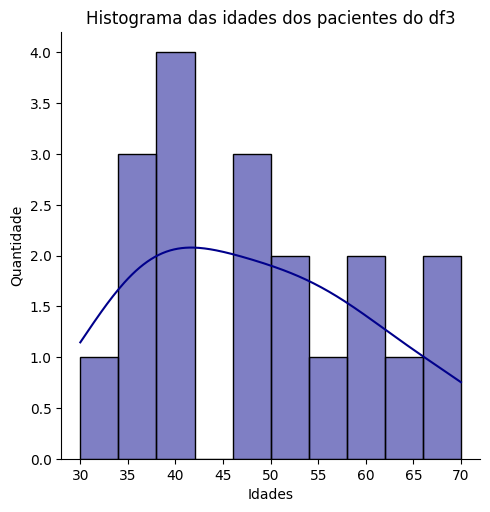

In [94]:
sns.displot(q3_df["Idade"], kde=True, bins=10, color = 'darkblue')
plt.xlabel("Idades")
plt.ylabel("Quantidade")
plt.title("Histograma das idades dos pacientes do df3")

In [98]:
#Teste T
q3_x = q3_df['Idade'].mean()
q3_u = 50
q3_s = q3_df['Idade'].std()
q3_n = q3_df.shape[0]

In [99]:
q3_t = (q3_x - q3_u) /(q3_s/(q3_n^2))

In [101]:
# P-valor
q3_p_valor = stats.norm.sf(abs(q3_t))

In [104]:
if alpha > q3_p_valor:
    print("A hipótese nula foi rejeitada, a média das pessoas na amostra possuem menos de 50 anos.")
else:
    print("A hipótese nula não foi rejeitada, a média das pessoas na amostra possuem mais de 50 anos.")

A hipótese nula foi rejeitada, a média das pessoas na amostra possuem menos de 50 anos.


4. Queremos entender que tipo de amostra estamos lidando se dividirmos
os conjuntos em 2, sendo um com pessoas que têm condições de
saúde adicionais e o outro com pessoas saudáveis. Seria dependente
ou independente?

5. Agora considere o um conjunto de pessoas aleatória que representam
o index do dataframe, índices = ([690, 894, 67, 201, 364, 19, 60, 319,
588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354,
Da engenharia à liderança, conectamos mulheres
que querem fazer a diferença
na tecnologia e inovação.
womakerscode.org
966, 943, 372]), podemos dizer que a pressão arterial média para
pacientes com condições de saúde adicionais é igual à pressão arterial
média para pacientes sem condições adicionais de saúde? Considere o
nível de significância a 6%.

6. Existe uma diferença significativa na pressão arterial média entre
diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)
<br>a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos
os grupos étnicos.
<br>b. Hipótese Alternativa (H1): Há uma diferença significativa na
pressão arterial média entre pelo menos dois grupos étnicos
nesta população

7. Lúcia é uma pesquisadora e tem o objetivo de entender a relação de
gênero neste grupo de pacientes. Acredita-se que há uma relação
entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

8. Existe uma associação entre a idade dos pacientes e sua pressão
arterial?
<br>a. Hipótese Nula (H0): A idade dos pacientes é independente da
pressão arterial.
<br>b. Hipótese Alternativa (H1): A idade dos pacientes está associada à
sua pressão arterial

9. Qual é o intervalo de confiança para a média da pressão arterial entre
os pacientes com condições de saúde adicionais? (nível de confiança
95%)


10. A distribuição da pressão arterial na população segue uma distribuição
normal?
<br>a. Hipótese Nula (H0): A distribuição da pressão arterial na
população segue uma distribuição normal.
<br>b. Hipótese Alternativa (H1): A distribuição da pressão arterial na
população não segue uma distribuição normal.